In [25]:
import matplotlib.pyplot as plt
import numpy as np
def FTMA(numerador, denominador):
  numerador = np.array(numerador, dtype=np.float64)
  denominador = np.array(denominador, dtype=np.float64)
  tamanho = len(denominador) - len(numerador)
  aux1 = np.zeros(tamanho)
  numerador = np.concatenate((aux1, numerador))
  FT = np.vstack((numerador, denominador))
  return FT
def RZ(FT, k_MA):
  numerador, denominador = FT[0], FT[1]
  num_raizes = len(np.roots(denominador))
  raizes = []
  for ganho in k_MA:
    ch_eq = denominador +  ganho*numerador
    ch_raizes = np.roots(ch_eq)
    ch_raizes.sort()
    raizes.append(ch_raizes)
  raizes = np.vstack(raizes)
  return raizes
def LR(k_MA, raizes):
  re = np.real(raizes)
  im = np.imag(raizes)
  cores = ['b', 'm', 'c', 'r', 'g']
  fig, ax = plt.subplots()
  ax.set_xlabel('Eixo Real [neper/s]')
  ax.set_ylabel('Eixo Imaginario [rad/s]')
  ax.axvline(x=0, color='k', lw=1)
  ax.grid(True, which='both')
  ax.scatter(re[0, :], im[0, :],
          marker='x',
          color='green')
  ax.scatter(re[-1, :], im[-1, :],
          marker='p',
          color='orange')
  k1 = ['k = {:1.2f}'.format(k) for k in k_MA]
  aux_re = re[1:-1, :]
  aux_im = im[1:-1, :]
  color_range = range(aux_re.shape[1])
  for r, i, j in zip(aux_re.T, aux_im.T, color_range):
    ax.plot(r, i, color=cores[j])
  return fig, ax

**Função de Transferência de Malha Aberta = k(s^2 + 2s + 2) / (s^3 + 2s^2 + s + 2)**

Obs: O primeiro array na FTMA é formado pelos coeficientes do polinômio do numerador e o segundo array de FTMA é formado pelos coeficientes do polinômio do denominador.

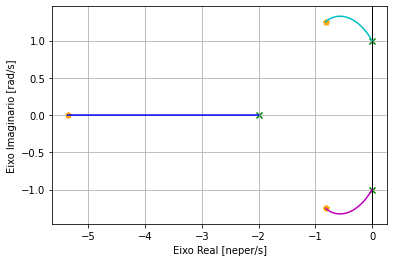

In [26]:
if __name__ == "__main__":
  aux2=np.linspace(0,5,num=10000)
  raizes = RZ(FTMA([1,2,2],[1,2,1,2]),aux2)
  fig, ax = LR(aux2,raizes)
  plt.show()

**Função de Transferência de Malha Aberta = k(5s^2 + 15s + 20) / (5s^5 + 57s^4 + 195s^3 + 218s^2 + 120s + 0)**

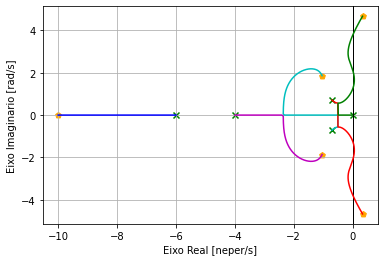

In [27]:
if __name__ == "__main__":
  aux2=np.linspace(0,250,num=10000)
  raizes = RZ(FTMA([5,10,20],[5,57,195,218,120,0]),aux2)
  fig, ax = LR(aux2,raizes)
  plt.show()